### Building Chatbot With Multiple Tools Using Langgraph

Create a chatbot with tool capabilities from arxiv, wikipedia search and some functions

In [ ]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [ ]:
pip install arxiv

  Using cached arxiv-2.2.0-py3-none-any.whl (11 kB)
  Using cached feedparser-6.0.12-py3-none-any.whl (81 kB)
  Using cached sgmllib3k-1.0.0.tar.gz (5.8 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for sgmllib3k: started
  Running setup.py install for sgmllib3k: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: sgmllib3k is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

arxiv


In [ ]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [ ]:
pip install Wikipedia

  Using cached wikipedia-1.4.0.tar.gz (27 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/106.4 kB ? eta -:--:--
     ------------------------------------ - 102.4/106.4 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 106.4/106.4 kB 1.2 MB/s eta 0:00:00
  Using cached soupsieve-2.8-py3-none-any.whl (36 kB)
  Running setup.py install for Wikipedia: started
  Running setup.py install for Wikipedia: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Wikipedia is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [ ]:
wiki.invoke("What is machine learning")

'Page: Machine learning\nSummary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML fi'

In [ ]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")



In [ ]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

C:\Users\window 11\AppData\Local\Temp\ipykernel_17864\3584238.py:4: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [ ]:
tavily.invoke("Provide me the recent AI news for oct 3rd 2025")

[{'title': 'AI Update, October 3, 2025: AI News and Views From the Past Week',
  'url': 'https://www.marketingprofs.com/opinions/2025/53797/ai-update-october-3-2025-ai-news-and-views-from-the-past-week',
  'content': 'Catch up on select AI news and developments from the past week or so: OpenAI launches Sora 2 with audio and likeness features.',
  'score': 0.88178825},
 {'title': 'An update on Artificial Intelligence (A.I.) technology | Oct. 3 - WNDU',
  'url': 'https://www.wndu.com/2025/10/03/an-update-artificial-intelligence-ai-technology-oct-3/',
  'content': '# An update on Artificial Intelligence (A.I.) technology | Oct. 3\n\nSOUTH BEND, Ind. (WNDU) - The last two weeks in AI were big. Think faster tools, safer systems and giant partnerships that will shape what our phones, computers and workplaces can do.\n\nFirst, Google’s AI team tightened its safety rules for powerful models — basically better guardrails so advanced systems don’t mislead people or act unpredictably. [...] OpenA

In [ ]:
### Combine all the tools in the list

tools=[arxiv,wiki,tavily]

In [ ]:
## Initialize my LLM model

from langchain_groq import ChatGroq

llm=ChatGroq(model="llama-3.1-8b-instant")

llm_with_tools=llm.bind_tools(tools)

In [ ]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '2tk476vbx', 'function': {'arguments': '{"query":"recent AI news"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 553, 'total_tokens': 573, 'completion_time': 0.023826574, 'prompt_time': 0.034049421, 'queue_time': 0.072652449, 'total_time': 0.057875995}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_33e8adf159', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--77905af8-429d-4815-ade0-0ba713aeb263-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent AI news'}, 'id': '2tk476vbx', 'type': 'tool_call'}], usage_metadata={'input_tokens': 553, 'output_tokens': 20, 'total_tokens': 573})

In [ ]:
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")]).tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'recent AI news'},
  'id': '93xnn64qm',
  'type': 'tool_call'}]

In [ ]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

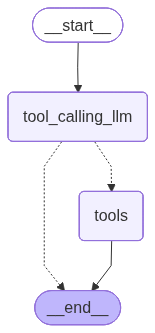

In [ ]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)


graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [ ]:
messages=graph.invoke({"messages":HumanMessage(content="1706.03762")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (k6js0nsdm)
 Call ID: k6js0nsdm
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [ ]:
messages=graph.invoke({"messages":HumanMessage(content="Provide me the top 10 recent AI news for MArch 3rd 2025")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Provide me the top 10 recent AI news for MArch 3rd 2025
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (3q0hkdvgw)
 Call ID: 3q0hkdvgw
  Args:
    query: AI news March 3rd 2025
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Weekly AI News: 3 March 2025 - AIforBusiness.net - YouTube", "url": "https://www.youtube.com/watch?v=kw21NJ7YmZM", "content": "This week’s AI update explores some of the most impactful developments shaping technology and society. OpenAI has unveiled GPT-4.5, a cutting-edge model with enhanced intuition and emotional intelligence. While its capabilities push AI closer to human-like perception, its high computational demands raise concerns about accessibility, particularly for smaller businesses. [...] A thought-provoking analysis in t

In [ ]:
messages=graph.invoke({"messages":HumanMessage(content="What is machine learning")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is machine learning
================================== Ai Message ==================================

<wikipedia>{"query": "machine learning"}</wikipedia>
